In [3]:
%matplotlib inline

In [204]:
import numpy as np
from kaggle.data import load_data_adjustable, save_submission
from sklearn.linear_model import LassoCV, RidgeCV
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [198]:
y, X, X_submission, ids_submission = load_data_adjustable(create_dummies=True, 
                                                          variance_threshold=0.6, 
                                                          drop_columns=None)
y = np.log(y)

# normalize data as done by Lars to allow for comparison
#X /= np.sqrt(np.sum(X ** 2, axis=0))

In [199]:
model = LassoCV(cv=20).fit(X,y)

In [200]:
m_log_alphas = -np.log10(model.alphas_)

In [201]:
# 0.20099509299692958

In [202]:
np.min(np.sqrt(model.mse_path_.mean(axis=-1)))

0.20099509299692961

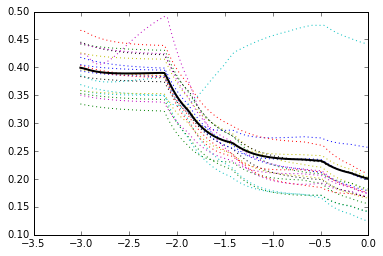

In [203]:
plt.figure()
ymin, ymax = y.min(), y.max()

plt.plot(-np.log10(model.alphas_), np.sqrt(model.mse_path_), ':')
plt.plot(-np.log10(model.alphas_), np.sqrt(model.mse_path_.mean(axis=-1)), 'k',
         label='Average across the folds', linewidth=2)

(0, 0.3)

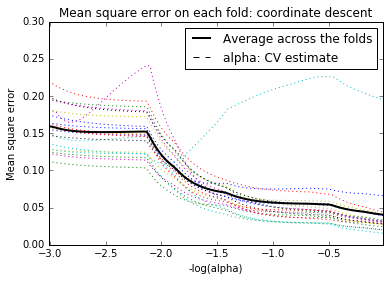

In [79]:
plt.figure()
ymin, ymax = 0, 0.3
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.ylim(ymin, ymax)

In [85]:
np.exp(0.01)

1.0100501670841679